# Random Forest

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv("./titanic/train.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
def cleanData(data):
    le=LabelEncoder()
    columns_to_drop=["PassengerId","Name","Ticket","Cabin","Embarked"]
    data_clean=data.drop(columns=columns_to_drop,axis=0)
    data_clean=data_clean.fillna(data_clean["Age"].mean())
    data_clean=data_clean.fillna(data_clean["Fare"].mean())
    data_clean["Sex"]=le.fit_transform(data_clean["Sex"])
    Y_clean=data_clean["Survived"]
    X_clean=data_clean.drop(columns=["Survived"],axis=0)
    return X_clean,Y_clean
    

In [4]:
X_clean,Y_clean=cleanData(data)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
xtrain,xtest,ytrain,ytest=train_test_split(X_clean,Y_clean,random_state=10,test_size=0.2)

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
#rf=RandomForestClassifier?

In [9]:
rf=RandomForestClassifier(n_estimators=10,criterion="entropy",max_depth=5)

In [10]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
rf.score(xtrain,ytrain)

0.824438202247191

In [12]:
rf.score(xtest,ytest)

0.8379888268156425

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
acc=cross_val_score(rf,xtrain,ytrain,cv=5).mean()

In [15]:
print(acc)

0.803398010440264


In [16]:
acc_list=[]
for i in range(1,50):
    acc=acc=cross_val_score(RandomForestClassifier(n_estimators=i,criterion='entropy',max_depth=5),xtrain,ytrain,cv=5).mean()
    acc_list.append(acc)

In [17]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")

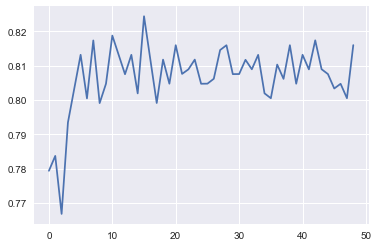

In [18]:
plt.plot(acc_list)

In [22]:
np.argmax(acc_list)

15

In [24]:
acc_listt=[]
for i in range(3,20):
    acc=cross_val_score(RandomForestClassifier(n_estimators=16,criterion='entropy',max_depth=i),xtrain,ytrain,cv=5).mean()
    acc_listt.append(acc)

7


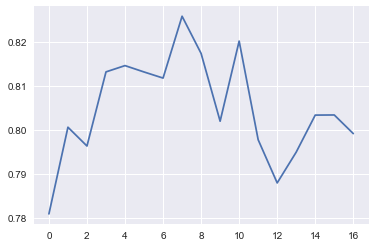

In [26]:
plt.plot(acc_listt)
print(np.argmax(acc_listt))

In [23]:
# 16 tree are needed for maximum accuracy

In [41]:
rfnew=RandomForestClassifier(n_estimators=16,criterion='entropy',max_depth=5)

In [42]:
rfnew.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=16,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
rfnew.score(xtrain,ytrain)

0.8370786516853933

In [44]:
rfnew.score(xtest,ytest)

0.8435754189944135